# SDQ: Magic Phase Diagrams

In [20]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig, multi_dot, inv, matrix_power, eigh, eigvalsh, eigvals
from scipy.optimize import curve_fit
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size']=18
#from scipy.linalg import expm, sqrtm
#from scipy.stats import linregress
from math import acos, factorial
import matplotlib.colors as colors
from scipy.special import eval_genlaguerre, gamma, hyp1f1, erf, erfc, erfi, dawsn
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D

Liouvillian of the SDQ:
$$\tilde{\mathcal L}_q = J \left( \begin{array}{cccc}
        0 & i & - i & 0\\
        i & -G + g G^2 & 0 & -i \\
        - i & 0 & -G + g G^2 & i \\
        0 & - i & i & -2 G + 4 g G^2
\end{array}\right)$$
Analytically, introducing $A= -G +g G^2$ and $B= - 2 G + 4 g G^2$ the eigenvalues are 
$$\Lambda_{m,+} = J \left( U_{m,+}-\frac{C}{U_{m,+}}- \frac{A+B}{3}\right),$$
where $m= -1, 0, +1$ and 
$$U_{m,\pm}=e^{m i \frac{2\pi}{3}}\big[-\frac{D}{2}\pm \sqrt{\big(\frac{D}{2}\big)^2+ C^3}\big]^{1/3},$$
$$C= - \big(\frac{A+B}{3}\big)^2 + \frac{4+AB}{3}$$ and $$D = \frac{A+B}{3}(4+AB) - 2B - 2 \big(\frac{A+B}{3}\big)^3$$

In [2]:
gR = 0
def A(g, G):
    return G*(-1+(g-gR)*G)
    #return -G*(1-g*G)
def B(g, G):
    return G*(-2+4*g*G)
    #return -2*G
def C(g, G):
    return -((A(g,G)+B(g,G))/3)**2 +(4+A(g,G)*B(g,G))/3
def D(g, G):
    return (A(g,G)+B(g,G))*(4+A(g,G)*B(g,G))/3 -2*B(g,G) -2*((A(g,G)+B(g,G))/3)**3
def U(m, pm, g, G):
    return (-D(g,G)/2 +pm*np.emath.sqrt((D(g,G)/2)**2+C(g, G)**3))**(1./3.)*np.exp(1j*m*2*np.pi/3)
def discriminant_cubic(g, G):
    return ((D(g,G)/2)**2+C(g, G)**3)
def eval1(g, G):
    return A(g, G)
def eval2(g, G):
    Ump = U(0, 1, g, G)
    return (Ump -C(g,G)/Ump +(A(g,G)+B(g,G))/3)
def eval3(g, G):
    Ump = U(1, 1, g, G)
    return (Ump -C(g,G)/Ump +(A(g,G)+B(g,G))/3)
def eval4(g, G):
    Ump = U(-1, 1, g, G)
    return (Ump -C(g,G)/Ump +(A(g,G)+B(g,G))/3)
def C_J(g, G, J):
    return -((A(g,G)+B(g,G))/3)**2 +(4*J**2+A(g,G)*B(g,G))/3
def D_J(g, G, J):
    return (A(g,G)+B(g,G))*(4*J**2+A(g,G)*B(g,G))/3 -2*B(g,G)*J**2 -2*((A(g,G)+B(g,G))/3)**3
def U_J(m, pm, g, G,J):
    return (-D_J(g,G,J)/2 +pm*np.emath.sqrt((D_J(g,G,J)/2)**2+C_J(g,G,J)**3))**(1./3.)*np.exp(1j*m*2*np.pi/3)
def eval1_J(g, G, J):
    return A(g, G)
def eval2_J(g, G, J):
    Ump = U_J(0, 1, g, G,J)
    return np.real((Ump -C_J(g,G,J)/Ump +(A(g,G)+B(g,G))/3))
def eval3_J(g, G, J):
    Ump = U_J(1, 1, g, G,J)
    return (Ump -C_J(g,G,J)/Ump +(A(g,G)+B(g,G))/3)
def eval4_J(g, G, J):
    Ump = U(-1, 1, g, G)
    return (Ump -C_J(g,G,J)/Ump +(A(g,G)+B(g,G))/3)
def evec1(g, G):
    return np.asarray([0,1,1,0])
def evec2(g, G):
    b0 = B(g,G)-eval2(g,G)
    b1 = 1j*(B(g,G)-2*eval2(g,G))/(-A(g,G)+eval2(g,G))
    b2 = - b1
    b3 = eval2(g,G)
    return np.asarray([b0, b1, b2, b3])/B(g,G)
    """b0 = B(g,G)/B(g,G)
    b1 = -1j*eval2(g,G)/2
    b2 = - b1
    b3 = B(g,G)/B(g,G)-eval2(g,G)*(A(g,G)-eval2(g,G))/2
    return np.asarray([b0, b1, b2, b3])/(2*B(g,G)/B(g,G)-eval2(g,G)*(A(g,G)-eval2(g,G))/2)"""
def evec3(g, G):
    b0 = B(g,G)-eval3(g,G)
    b1 = 1j*(B(g,G)-2*eval3(g,G))/(-A(g,G)+eval3(g,G))
    b2 = - b1
    b3 = eval3(g,G)
    return np.asarray([b0, b1, b2, b3])/B(g,G)
def evec4(g, G):
    b0 = B(g,G)-eval4(g,G)
    b1 = 1j*(B(g,G)-2*eval4(g,G))/(-A(g,G)+eval4(g,G))
    b2 = - b1
    b3 = eval4(g,G)
    return np.asarray([b0, b1, b2, b3])/B(g,G)
def xBloch(g, G):
    λ0 = eval2(g, G)
    #return -B(g,G)*np.sqrt(2)/(4 + (2*λ0-B(g,G))*(λ0-A(g,G)))
    return np.sqrt(2)*(B(g,G)-2*λ0)/(B(g,G)*(λ0-A(g,G)))
def yBloch(g, G):
    λ0 = eval2(g, G)
    #return (-np.sqrt(2)*(2*λ0- B(g,G)+λ0*(λ0-A(g,G))*(λ0-B(g,G))))/(4 + (2*λ0-B(g,G))*(λ0-A(g,G)))
    return -np.sqrt(2)*(B(g,G)-2*λ0)/(B(g,G)*(λ0-A(g,G)))
def zBloch(g, G):
    λ0 = eval2(g, G)
    #return -B(g,G)*(λ0-A(g,G))/(4 + (2*λ0-B(g,G))*(λ0-A(g,G)))
    return (B(g,G)-2*λ0)/(B(g,G))
def tildeSRE(g, G):
    #l0 = eval2(g, G)
    #numer = (2*(4 - A(g,G)*l0 + l0**2)**4)/(16*l0**4 + (A(g,G) - l0)**4*l0**4 + (4 - A(g,G)*l0 + l0**2)**4)
    #return np.log(numer)/np.log(2)
    rx = xBloch(g,G)
    ry = yBloch(g,G)
    rz = zBloch(g,G)
    return -np.log((1+rx**4+ry**4+rz**4)/(1+rx**2+ry**2+rz**2))/np.log(2)
    """L = np.abs(rx) + np.abs(ry) + np.abs(rz)
    if L>1:
        return -np.log((1+rx**4+ry**4+rz**4)/(1+rx**2+ry**2+rz**2))/np.log(2)
    else:
        return 0"""
"""def tildeSRE(g, G):
    l0 = eval2(g, G)
    a = A(g, G)
    numer = (16*l0**4 + (a - l0)**4*l0**4 + (4 - a*l0 + l0**2)**4)/((4 - a*l0 + l0**2)**2*(16 + 2*l0*(6*l0 + a**2*l0 + l0**3 - 2*a*(2 + l0**2))))
    ry = yBloch(g,G)
    rz = zBloch(g,G)
    L = np.abs(ry) + np.abs(rz)
    if L>1:
        return -np.log(numer)/np.log(2)
    else:
        return 0"""
#print(SRE(1,1), tildeSRE(1,1))
def gap(g, G):
    diff_arr = np.asarray([eval2(g,G)-eval1(g, G),\
                           eval2(g,G)-np.real(eval3(g, G)),\
                           eval2(g,G)-np.real(eval4(g, G))])
    return np.min(diff_arr, axis = 0)
def Mlin(g, G):
    ry = yBloch(g,G)
    rz = zBloch(g,G)
    L = np.abs(ry) + np.abs(rz)
    R = np.max([np.abs(ry), np.abs(rz)])
    if L>1:
        return 1 - (1 + 3*R**4 + (L-3*R)**4)/2
    else:
        return 0
def fidelityH(g, G):
    z = zBloch(g, G)
    y = yBloch(g, G)
    aux1 = (1+y/np.sqrt(2)+z/np.sqrt(2))/2
    aux2 = (1+y/np.sqrt(2)-z/np.sqrt(2))/2
    aux3 = (1-y/np.sqrt(2)+z/np.sqrt(2))/2
    aux4 = (1-y/np.sqrt(2)-z/np.sqrt(2))/2
    return np.max([aux1, aux2, aux3, aux4])
    #return (1-y/np.sqrt(2)+z/np.sqrt(2))/2
def fidelityT(g, G):
    z = zBloch(g, G)
    y = yBloch(g, G)
    aux1 = (1+y/np.sqrt(3)+z/np.sqrt(3))/2
    aux2 = (1+y/np.sqrt(3)-z/np.sqrt(3))/2
    aux3 = (1-y/np.sqrt(3)+z/np.sqrt(3))/2
    aux4 = (1-y/np.sqrt(3)-z/np.sqrt(3))/2
    return np.max([aux1, aux2, aux3, aux4])
    #return (1-y/np.sqrt(2)+z/np.sqrt(2))/2

In [3]:
def create_Liouv_SDQ(g, G):
    aux = np.asarray([[0,1j,-1j,0],[1j,0,0,-1j],[-1j,0,0,1j],[0,-1j,1j,0]])
    #aux[1,1] = -G + g*G**2
    #aux[2,2] = -G + g*G**2
    aux[1,1] = -G - g*G**2
    aux[2,2] = -G - g*G**2
    #aux[3,3] = -2*G + 4*g*G**2
    aux[3,3] = -2*G
    return aux

In [38]:
#G_arr = np.linspace(0, 5, 500)
#g_arr = np.linspace(0.01, 5, 600)
auxg = np.linspace(-3, 2, 400)
#aux = np.linspace(-1, 3, 500)
aux = np.linspace(-1, 1.2, 400)
g_arr = 10**auxg
G_arr = 10**aux
N= 2
SRE_arr = np.zeros((len(g_arr), len(G_arr)))
SR_stst_arr = np.zeros((len(g_arr), len(G_arr)))
tildeSRE_arr = np.zeros((len(g_arr), len(G_arr)))
gap_arr = np.zeros((len(g_arr), len(G_arr)))
Mlin_arr = np.zeros((len(g_arr), len(G_arr)))
fidH_arr = np.zeros((len(g_arr), len(G_arr)))
fidT_arr = np.zeros((len(g_arr), len(G_arr)))
gammaGamma_arr = np.zeros((len(g_arr), len(G_arr)))
#coords_arr = np.zeros((3, len(g_arr), len(G_arr)))
for k in range(len(G_arr)):
    for n in range(len(g_arr)):
        #SRE_arr[n,k] = np.real(SRE(g_arr[n], G_arr[k]))
        tildeSRE_arr[n,k] = np.real(tildeSRE(g_arr[n], G_arr[k]))
        gap_arr[n,k] = gap(g_arr[n], G_arr[k])
        #coords_arr[0, n,k] = xBloch(g_arr[n], G_arr[k])
        #coords_arr[1, n,k] = yBloch(g_arr[n], G_arr[k])
        #coords_arr[2, n,k] = zBloch(g_arr[n], G_arr[k])
        #Mlin_arr[n,k] = Mlin(g_arr[n], G_arr[k])
        gammaGamma_arr[n,k] = g_arr[n]*G_arr[k]
        #fidH_arr[n,k] = fidelityH(g_arr[n], G_arr[k])
        #fidT_arr[n,k] = fidelityT(g_arr[n], G_arr[k])

<ipython-input-38-dd167ff28338>:22: ComplexWarning: Casting complex values to real discards the imaginary part
  gap_arr[n,k] = gap(g_arr[n], G_arr[k])


In [39]:
def gammaN_G(G):
    #return ((2*2**(2/3))/(-15*G + np.emath.sqrt(-16 + 225*G**2))**(1/3) + 2**(1/3)*(-15*G + np.emath.sqrt(-16 + 225*G**2))**(1/3))/(6.*G**2)
    return (G**3 + np.sqrt(8*G**4 + G**6))/(6.*G**4)
    #return (3*G**3 + np.sqrt(3)*np.sqrt(8*G**4 + 3*G**6))/(12.*G**4)
    #return 1/(9.*G) - (-486*G**6 - 81*G**8)/\
    #        (729.*G**5*(36*G**10 + G**12 + 3*np.sqrt(6)*np.emath.sqrt(-4*G**18 + 22*G**20 + G**22))**0.3333333333333333)\
    #        + (36*G**10 + G**12 + 3*np.sqrt(6)*np.emath.sqrt(-4*G**18 + 22*G**20 + G**22))**0.3333333333333333/(9.*G**5)
    #return  1/(6.*G) - (-162*G**6 - 81*G**8)/\
    #        (486.*G**5*(9*G**10 + G**12 + np.emath.sqrt(-8*G**18 + 69*G**20 + 12*G**22))**0.3333333333333333) + \
    #        (9*G**10 + G**12 + np.emath.sqrt(-8*G**18 + 69*G**20 + 12*G**22))**0.3333333333333333/(6.*G**5)

In [40]:
"""print(np.max(coords_arr[0,:,:]), np.max(coords_arr[1,:,:]), np.max(coords_arr[2,:,:]))
plt.figure(figsize = [5,3])
p1 = plt.pcolormesh(g_arr, G_arr, np.transpose(coords_arr[2,:,:]), rasterized = True, cmap = 'RdBu', vmin = -1, vmax = 1)
#p1 = plt.contourf(g_arr, G_arr, np.transpose(np.sqrt(fidH_arr)), 50, rasterized = True, cmap = 'Blues', vmin = 0.927, vmax = 1)
plt.yscale('log')
plt.xscale('log')
#cb = plt.colorbar(p1, extend = 'min', ticks = [0.927, 0.95, 0.975, 1])
cb = plt.colorbar(p1)
plt.xlabel(r"$\gamma J$")
plt.ylabel(r"$\Gamma/J$")
#plt.title(r"$M_2(\hat \rho)$")
plt.title(r"$ \mathcal F_H(\hat \rho^\mathrm{S})$")
plt.xlim(g_arr[0], g_arr[-1])
#plt.plot(1/(2*G_arr), G_arr, ls ='-', c = 'k', lw = 0.3)
#plt.hlines(2,g_arr[0], 1/4, color = 'gray', ls ='-', lw = 0.3)
plt.plot(2/(4*G_arr), G_arr, ls = '--', c = 'k', lw = 1.5, alpha = 1, label = r"$\gamma = \frac{1}{2\Gamma}$")
plt.hlines(2,g_arr[0], 1/4, color = 'orange', ls ='--', label = r"$\Gamma = 2 J$")
plt.plot(1/(np.sqrt(2)*G_arr[G_arr<2]**2), G_arr[G_arr<2], ls = '--', c = 'lime', lw = 1.5, label =r"$\gamma = \frac{1}{\sqrt{2}\Gamma^2}$")
#plt.plot(gammaN_G(G_arr), G_arr, ls = '-.', c = 'violet', lw = 1.5, label =r"$\gamma_{\rm interp}$")
plt.xticks([1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2])
plt.yticks([1e-1, 1e-1, 1e0, 1e1, 1e2])
#plt.scatter(0.0652529, 3.59919, marker = '*', c = 'b')
plt.legend(loc = 'upper right', frameon = False, labelspacing = 0, handletextpad = 0.1, borderpad = 0.1, handlelength = 1)
#plt.savefig("SDQ_fidH.pdf", bbox_inches = 'tight')
plt.show()"""

'print(np.max(coords_arr[0,:,:]), np.max(coords_arr[1,:,:]), np.max(coords_arr[2,:,:]))\nplt.figure(figsize = [5,3])\np1 = plt.pcolormesh(g_arr, G_arr, np.transpose(coords_arr[2,:,:]), rasterized = True, cmap = \'RdBu\', vmin = -1, vmax = 1)\n#p1 = plt.contourf(g_arr, G_arr, np.transpose(np.sqrt(fidH_arr)), 50, rasterized = True, cmap = \'Blues\', vmin = 0.927, vmax = 1)\nplt.yscale(\'log\')\nplt.xscale(\'log\')\n#cb = plt.colorbar(p1, extend = \'min\', ticks = [0.927, 0.95, 0.975, 1])\ncb = plt.colorbar(p1)\nplt.xlabel(r"$\\gamma J$")\nplt.ylabel(r"$\\Gamma/J$")\n#plt.title(r"$M_2(\\hat \rho)$")\nplt.title(r"$ \\mathcal F_H(\\hat \rho^\\mathrm{S})$")\nplt.xlim(g_arr[0], g_arr[-1])\n#plt.plot(1/(2*G_arr), G_arr, ls =\'-\', c = \'k\', lw = 0.3)\n#plt.hlines(2,g_arr[0], 1/4, color = \'gray\', ls =\'-\', lw = 0.3)\nplt.plot(2/(4*G_arr), G_arr, ls = \'--\', c = \'k\', lw = 1.5, alpha = 1, label = r"$\\gamma = \x0crac{1}{2\\Gamma}$")\nplt.hlines(2,g_arr[0], 1/4, color = \'orange\', ls =\'--

0.5849557254877987


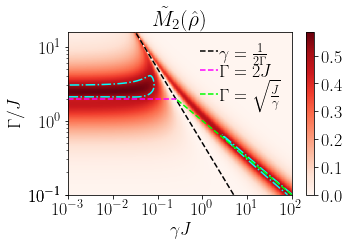

In [52]:
#Plot to show that they're all negative
plt.figure(figsize = [5,3])
print(np.max(tildeSRE_arr))
p1 = plt.pcolormesh(g_arr, G_arr, np.transpose(tildeSRE_arr), rasterized = True, shading = 'auto', cmap = 'Reds', vmin = 0, vmax = np.log2(3/2))
CS = plt.contour(g_arr, G_arr, np.transpose(tildeSRE_arr), [0.5], colors = 'cyan', linestyles = '-.')
#plt.clabel(CS, fontsize=10)
plt.yscale('log')
plt.xscale('log')
cb = plt.colorbar(p1, ticks = [0, 0.1, 0.2, 0.3,0.4, 0.5])
plt.xlabel(r"$\gamma J$")
plt.ylabel(r"$\Gamma/J$")
plt.title(r"$\tilde M_2(\hat \rho)$")
#plt.plot(1/(2*G_arr), G_arr, ls ='-', c = 'k', lw = 0.3)
#plt.hlines(2,g_arr[0], 1/4, color = 'gray', ls ='-', lw = 0.3)
plt.xlim(g_arr[0], g_arr[-1])
plt.plot(2/(4*G_arr), G_arr, ls = '--', c = 'k', lw = 1.5, alpha = 1, label = r"$\gamma = \frac{1}{2\Gamma}$")
#plt.hlines(np.sqrt(6),g_arr[0], 1/4, color = 'orange', ls ='--', label = r"$\Gamma = 2 J$")
plt.hlines(2,g_arr[0], 1/4, color = 'magenta', ls ='--', label = r"$\Gamma = 2 J$")
plt.plot(1/(G_arr[G_arr<2]**2), G_arr[G_arr<2], ls = '--', c = 'lime', lw = 1.5, label =r"$\Gamma = \sqrt{\frac{J}{\gamma}}$")
#plt.plot(gammaN_G(G_arr), G_arr, ls = '-.', c = 'violet', lw = 1.5, label =r"$\gamma_{\rm interp}$")
plt.xticks([1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2])
plt.yticks([1e-1, 1e-1, 1e0, 1e1])
#plt.scatter(0.0652529, 3.59919, marker = '*', c = 'w')
plt.legend(loc = 'upper right', frameon = False, labelspacing = 0, handletextpad = 0.1, borderpad = 0.1, handlelength = 1)
plt.savefig("SDQxy_tildeSRE.pdf", bbox_inches = 'tight')
plt.show()

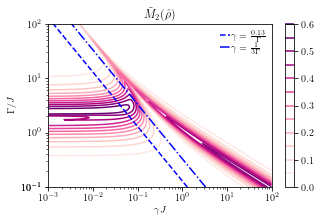

In [8]:
#Plot to show that they're all negative
plt.figure(figsize = [5,3])
p1 = plt.contour(g_arr, G_arr, np.transpose(tildeSRE_arr), levels = 13, cmap = 'RdPu')
#p2 = plt.contour(g_arr, G_arr, np.transpose(gap_arr), cmap = "Blues", locator=mpl.ticker.LogLocator(numticks = 300))
plt.yscale('log')
plt.xscale('log')
cb = plt.colorbar(p1)
plt.xlabel(r"$\gamma J$")
plt.ylabel(r"$\Gamma/J$")
plt.title(r"$\tilde M_2(\hat \rho)$")
#plt.plot(1/(2*G_arr), G_arr, ls ='-', c = 'k', lw = 0.3)
#plt.hlines(2,g_arr[0], 1/4, color = 'gray', ls ='-', lw = 0.3)
plt.xlim(g_arr[0], g_arr[-1])
plt.plot(0.13/(G_arr), G_arr, ls = '--', c = 'b', lw = 1.5, alpha = 1, label = r"$\gamma = \frac{0.13}{\Gamma}$")
plt.plot(1/(3*G_arr), G_arr, ls = '-.', c = 'b', lw = 1.5, alpha = 1, label = r"$\gamma = \frac{1}{3\Gamma}$")
#plt.hlines(2,g_arr[0], 1/4, color = 'orange', ls ='--', label = r"$\Gamma = 2 J$")
#plt.plot(2/(np.sqrt(3)*G_arr[G_arr<4]**2), G_arr[G_arr<4], ls = '--', c = 'lime', lw = 1.5, label =r"$\gamma = \frac{2}{\sqrt{3}\Gamma^2}$")
#plt.plot(gammaN_G(G_arr), G_arr, ls = '-.', c = 'violet', lw = 1.5, label =r"$\gamma_{\rm interp}$")
plt.xticks([1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2])
plt.yticks([1e-1, 1e-1, 1e0, 1e1, 1e2])
plt.legend(loc = 'upper right', frameon = False, labelspacing = 0, handletextpad = 0.1, borderpad = 0.1, handlelength = 1)
#plt.savefig("SDQ_tildeSRE_levels.pdf", bbox_inches = 'tight')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


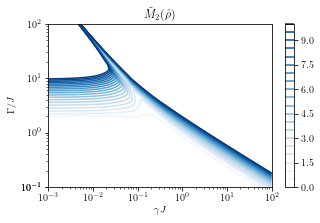

In [9]:
#Plot to show that they're all negative
plt.figure(figsize = [5,3])
lim_up = 10
gap_arr_mod = np.copy(gap_arr)
gap_arr_mod[np.where(gap_arr>lim_up)]=lim_up
lim_lo = 0.01
gap_arr_mod[np.where(gap_arr<lim_lo)]=lim_lo
#p1 = plt.contour(g_arr, G_arr, np.transpose(tildeSRE_arr), levels = 15, cmap = 'RdPu')
p1 = plt.contour(g_arr, G_arr, np.transpose(gap_arr_mod),20, cmap = "Blues")
plt.yscale('log')
plt.xscale('log')
cb = plt.colorbar(p1)
plt.xlabel(r"$\gamma J$")
plt.ylabel(r"$\Gamma/J$")
plt.title(r"$\tilde M_2(\hat \rho)$")
#plt.plot(1/(2*G_arr), G_arr, ls ='-', c = 'k', lw = 0.3)
#plt.hlines(2,g_arr[0], 1/4, color = 'gray', ls ='-', lw = 0.3)
plt.xlim(g_arr[0], g_arr[-1])
#plt.plot(2/(4*G_arr), G_arr, ls = '--', c = 'k', lw = 1.5, alpha = 1, label = r"$\gamma = \frac{1}{2\Gamma}$")
#plt.hlines(2,g_arr[0], 1/4, color = 'orange', ls ='--', label = r"$\Gamma = 2 J$")
#plt.plot(2/(np.sqrt(3)*G_arr[G_arr<4]**2), G_arr[G_arr<4], ls = '--', c = 'lime', lw = 1.5, label =r"$\gamma = \frac{2}{\sqrt{3}\Gamma^2}$")
#plt.plot(gammaN_G(G_arr), G_arr, ls = '-.', c = 'violet', lw = 1.5, label =r"$\gamma_{\rm interp}$")
plt.xticks([1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2])
plt.yticks([1e-1, 1e-1, 1e0, 1e1, 1e2])
plt.legend(loc = 'upper right', frameon = False, labelspacing = 0, handletextpad = 0.1, borderpad = 0.1, handlelength = 1)
plt.savefig("SDQ_gap_levels.pdf", bbox_inches = 'tight')
plt.show()

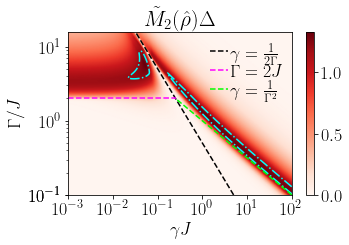

In [55]:
#Plot to show that they're all negative
plt.figure(figsize = [5,3])
p1 = plt.pcolormesh(g_arr, G_arr, np.transpose(tildeSRE_arr*gap_arr), cmap = 'Reds', vmin = 0, rasterized = True, shading = 'gouraud')
plt.contour(g_arr, G_arr, np.transpose(tildeSRE_arr*gap_arr), [1.2], colors = 'cyan', linestyles = '-.')
#p1 = plt.contour(g_arr, G_arr, np.transpose(tildeSRE_arr*gap_arr), levels = 20, cmap = 'RdPu')
#p2 = plt.contour(g_arr, G_arr, np.transpose(gap_arr_mod), cmap = "Blues")
plt.yscale('log')
plt.xscale('log')
cb = plt.colorbar(p1)
plt.xlabel(r"$\gamma J$")
plt.ylabel(r"$\Gamma/J$")
plt.title(r"$\tilde M_2(\hat \rho)\Delta $")
#plt.plot(1/(2*G_arr), G_arr, ls ='-', c = 'k', lw = 0.3)
#plt.hlines(2,g_arr[0], 1/4, color = 'gray', ls ='-', lw = 0.3)
plt.xlim(g_arr[0], g_arr[-1])
#plt.plot(2/(4*G_arr), G_arr, ls = '--', c = 'k', lw = 1.5, alpha = 1, label = r"$\gamma = \frac{1}{2\Gamma}$")
#plt.hlines(2,g_arr[0], 1/4, color = 'orange', ls ='--', label = r"$\Gamma = 2 J$")
#plt.plot(2/(np.sqrt(3)*G_arr[G_arr<4]**2), G_arr[G_arr<4], ls = '--', c = 'lime', lw = 1.5, label =r"$\gamma = \frac{2}{\sqrt{3}\Gamma^2}$")
#plt.plot(gammaN_G(G_arr), G_arr, ls = '-.', c = 'violet', lw = 1.5, label =r"$\gamma_{\rm interp}$")
plt.xticks([1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2])
plt.yticks([1e-1, 1e-1, 1e0, 1e1, 1e2])
plt.plot(2/(4*G_arr), G_arr, ls = '--', c = 'k', lw = 1.5, alpha = 1, label = r"$\gamma = \frac{1}{2\Gamma}$")
#plt.hlines(np.sqrt(6),g_arr[0], 1/4, color = 'orange', ls ='--', label = r"$\Gamma = 2 J$")
plt.hlines(2,g_arr[0], 1/4, color = 'magenta', ls ='--', label = r"$\Gamma = 2 J$")
plt.plot(1/(G_arr[G_arr<2]**2), G_arr[G_arr<2], ls = '--', c = 'lime', lw = 1.5, label =r"$\gamma = \frac{1}{\Gamma^2}$")
plt.legend(loc = 'upper right', frameon = False, labelspacing = 0, handletextpad = 0.1, borderpad = 0.1, handlelength = 1)
plt.savefig("SDQxy_tildeSRExgap_levels.pdf", bbox_inches = 'tight')
plt.show()